# Feature selection for classification
## Random forest
We use Random forest for our binary classification of Lung Cancer and we combine it with seveval techniques of feature/variable selection:
1. Variable Importance
1. Pruning
1. ID3/C4.5


------------------------
* https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
* https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
* https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6
* https://www.geeksforgeeks.org/validation-curve/
------------------------

### To implement:
1. Random Forest classifier: choose optimal tuning parameters (how? cv), pick first variables using Importance Variable measure
1. Boosting (?)

RMK: pick the most important variables as a mean of a k-fold cross validation on the Random forests: split training as training and validation set, find a model, use it in classifying the test set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, RandomizedSearchCV
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier #, GradientBoostingRegressor, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, roc_curve, accuracy_score, precision_score, recall_score, roc_auc_score


%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
lung_train = pd.read_csv("dataset/lung_training_balanced.csv")
lung_test = pd.read_csv("dataset/lung_test.csv")

In [3]:
sum(lung_train['label'] == lung_train['class']) == len(lung_train)

True

In [4]:
lung_train.head() # non ha DepMap_ID, ma ha class

,A1BG..1.,A1CF..29974.,A2M..2.,A2ML1..144568.,A3GALT2..127550.,A4GALT..53947.,A4GNT..51146.,AAAS..8086.,AACS..65985.,AADAC..13.,...,ZXDA..7789.,ZXDB..158586.,ZXDC..79364.,ZYG11A..440590.,ZYG11B..79699.,ZYX..7791.,ZZEF1..23140.,ZZZ3..26009.,label,class
0,0.011852,0.014244,0.001433,0.005237,0.058875,0.069729,0.013034,0.218439,0.013079,0.009822,...,0.013959,0.014200,0.014770,0.043878,0.107509,0.035313,0.072556,0.388106,1,1
1,0.014506,0.107842,0.010356,0.006388,0.063209,0.030894,0.015566,0.462745,0.049971,0.017062,...,0.035662,0.148649,0.026746,0.034327,0.088767,0.010650,0.029632,0.408058,1,1
2,0.022699,0.058800,0.017680,0.020391,0.030993,0.207112,0.021517,0.032470,0.033668,0.034717,...,0.044431,0.013567,0.013887,0.052128,0.096930,0.024114,0.193605,0.247866,1,1
3,0.023099,0.016779,0.047539,0.008929,0.030545,0.110965,0.017461,0.119782,0.739435,0.013301,...,0.018103,0.015658,0.007028,0.038761,0.099183,0.008835,0.032050,0.303220,1,1
4,0.016336,0.136453,0.024670,0.007446,0.094383,0.129190,0.029152,0.320773,0.014914,0.036748,...,0.035763,0.013237,0.059203,0.058486,0.119531,0.067392,0.027407,0.061682,1,1


In [5]:
lung_test.head() # ha DepMap_ID, ma ha solo label

,DepMap_ID,A1BG..1.,A1CF..29974.,A2M..2.,A2ML1..144568.,A3GALT2..127550.,A4GALT..53947.,A4GNT..51146.,AAAS..8086.,AACS..65985.,...,ZWINT..11130.,ZXDA..7789.,ZXDB..158586.,ZXDC..79364.,ZYG11A..440590.,ZYG11B..79699.,ZYX..7791.,ZZEF1..23140.,ZZZ3..26009.,label
0,ACH-000009,0.042667,0.050918,0.015425,0.013461,0.025152,0.074668,0.037041,0.174388,0.030044,...,0.417735,0.029430,0.003645,0.053849,0.118411,0.410616,0.034562,0.068021,0.237540,0
1,ACH-000012,0.116891,0.016414,0.002584,0.001259,0.006843,0.198696,0.002273,0.162922,0.022898,...,0.960272,0.011820,0.023760,0.011905,0.008734,0.039195,0.066350,0.042229,0.396633,1
2,ACH-000022,0.033179,0.009500,0.005520,0.041548,0.072657,0.029613,0.019009,0.052439,0.031351,...,0.205466,0.018421,0.012871,0.020502,0.009225,0.029040,0.008182,0.037064,0.259274,0
3,ACH-000025,0.099894,0.136329,0.031623,0.007211,0.030127,0.064356,0.084561,0.431292,0.108109,...,0.815988,0.009664,0.006521,0.193002,0.034718,0.146196,0.044357,0.136430,0.362707,0
4,ACH-000052,0.037482,0.042253,0.011060,0.011858,0.051678,0.122061,0.010784,0.234959,0.009226,...,0.804443,0.014082,0.067084,0.009497,0.008526,0.084684,0.090982,0.048727,0.630893,0


In [6]:
X_train = lung_train.drop(["label", "class"], axis = 1)
y_train = lung_train["label"]

X_test = lung_test.drop(["DepMap_ID", "label"], axis = 1)
y_test = lung_test["label"]

In [178]:
# And split data to create training and validating set
X_train_bis, X_val, y_train_bis, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 2311)

In [38]:
y_train_bis.sum()/len(y_train_bis), y_val.sum()/len(y_val)

(0.20888157894736842, 0.21311475409836064)

## Random Forest Classifier

A Random Forest is an *ensemble* method, i.e. an approach that combines many simple methods. here classification trees, to obotain a single and more powerful one. In particular, Random Forests fit different decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy. 
The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default). If max_samples = n_features, then the whole dataset is used to build each tree and this is called Bagging.

___________________
Why not Bagging?

Primarly for two reasons:
1. our dataset is "too big", it is computationally onerous using all variables;
2. tree in bagging can be higly correlated.

___________________
What is *bootstrap*?

Each tree in the Random Forest learns from a random sample which is **drawn with replacement**. Thus, some samples can be used multiple times in a single tree.
In this situation, it can be shown that on average not all observation are used to fit the tree. Then, the idea is to use these remaing observations, known as *out-of-bag* obs, for quickly estimating the generalization accuracy. An oob error estimate is almost identical to that obtained by k-fold cv. Unlike many other nonlinear estimators, random forests can be fit in one sequence, with cross-validation being performed along the way.

___________________
What is *class_weight*?

Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. 

The *balanced* mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

The *balanced_subsample* mode is the same as balanced except that weights are computed based on the bootstrap sample for every tree grown.

___________________
Why we do not prune Random Forests?

Roughly speaking, some of the potential over-fitting that might happen in a single tree (which is a reason you do pruning generally) is mitigated because:
* bootstrap samples are used to train the individual trees;
* we have a multitude of random trees using random features and thus the individual trees are strong but not so correlated with each other.

In [161]:
rf_classifier = RandomForestClassifier(random_state = 2311, n_jobs = -1,
                        min_samples_leaf = 50, n_estimators = 500,
                        max_depth = 4, class_weight = "balanced_subsample",
                        bootstrap = True, oob_score = True)

In [162]:
rf_classifier.fit(X_train_bis, y_train_bis)
print('Training score: ', rf_classifier.score(X_train_bis, y_train_bis))
print('Test score: ', rf_classifier.score(X_val_bis, y_val_bis))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Training score:  0.9819078947368421
Test Error:  0.9180327868852459


In [163]:
accuracy_score(y_val, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_val, y_pred), 3)*100} %")

The accuracy of the model is 91.8 %


In [202]:
y_val_pred = rf_classifier.predict(X_val)
y_val_pred.sum() 
# It has predicted some 1 but test score too high... Overfit?

42

### Computing Area under ROC curve
We use *roc_auc_score(y_true, y_score,...)*, where:
* y_true are the true labels;
* y_score are the target scores.

The *predict_proba()* method returns a two-dimensional array, containing the estimated probabilities for each instance and each class.

In [213]:
rf_classifier.predict_proba(X_train_bis)

array([[0.71711353, 0.28288647],
       [0.64140017, 0.35859983],
       [0.55151256, 0.44848744],
       ...,
       [0.24839168, 0.75160832],
       [0.38022653, 0.61977347],
       [0.46036454, 0.53963546]])

In [212]:
train_probs = rf_classifier.predict_proba(X_train_bis)[:, 1]
probs = rf_classifier.predict_proba(X_val)[:, 1]

print(f'Train ROC AUC Score: {roc_auc_score(y_train_bis, train_probs)}')
print(f'Test ROC AUC Score: {roc_auc_score(y_val, probs)}')

# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_val_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print(f'Area under ROC curve: {roc_auc}')

Train ROC AUC Score: 0.9988540933422824
Test ROC AUC Score: 0.9687820512820513


In [169]:
# ROC curve plot

def evaluate_model(y_pred, probs, train_predictions, train_probs):
    baseline = {}
    baseline['recall'] = recall_score(y_val, [1 for _ in range(len(y_val))])
    baseline['precision'] = precision_score(y_val, [1 for _ in range(len(y_val))])
    baseline['roc'] = 0.5
    
    results = {}
    results['recall'] = recall_score(y_val, y_pred)
    results['precision'] = precision_score(y_val, y_pred)
    results['roc'] = roc_auc_score(y_val, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train_bis, train_predictions)
    train_results['precision'] = precision_score(y_train_bis, train_predictions)
    train_results['roc'] = roc_auc_score(y_train_bis, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} - Test: {round(results[metric], 2)}, Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_val, [1 for _ in range(len(y_val))])
    model_fpr, model_tpr, _ = roc_curve(y_val, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'Baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'Model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 - Test: 1.0, Train: 0.91
Precision Baseline: 0.21 - Test: 1.0, Train: 1.0
Roc Baseline: 0.5 - Test: 0.97, Train: 1.0


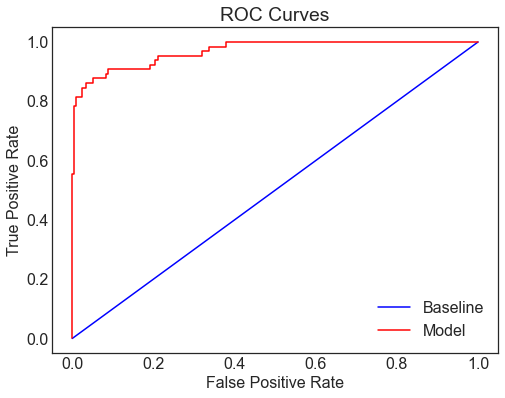

In [214]:
train_predictions = rf_classifier.predict(X_train_bis)

evaluate_model(y_pred, probs, train_predictions, train_probs)

In [171]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 20,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

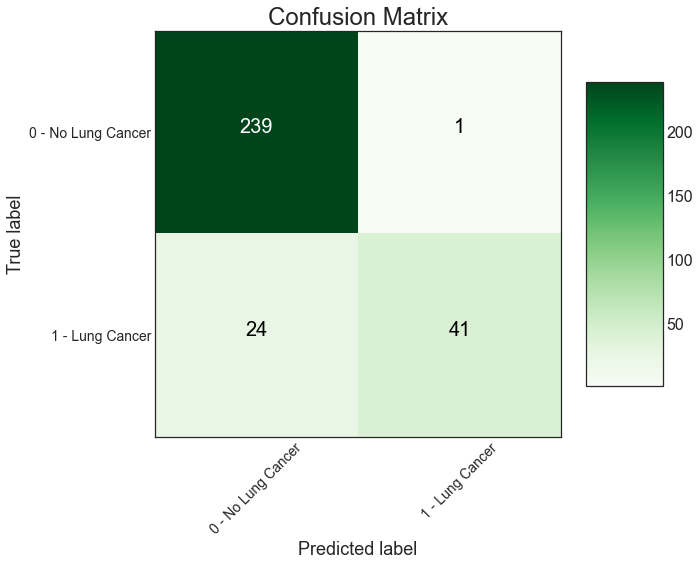

In [172]:
# Let us plot it
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
                        title = 'Confusion Matrix')

In [224]:
# Feature Importances
feat_impo = rf_classifier.feature_importances_

# Then sort the feature importances by most important first
feat_impo_ranked = pd.Series(rf_classifier.feature_importances_, index = X_train_bis.columns).sort_values(ascending = False)
feat_impo_ranked = pd.DataFrame({"Gene":feat_impo_ranked.index, "Importance":feat_impo_ranked.values})

# Print out the first 200 feature and importances
for gene in range(200):
    print(f"Gene '{feat_impo_ranked.Gene[gene]}' has Importance: {feat_impo_ranked.Importance[gene]}")


Gene 'RPP25L..138716.' has Importance: 0.006471828750086387
Gene 'HIST1H2BC..8347.' has Importance: 0.006180930119885238
Gene 'RAB18..22931.' has Importance: 0.00593867963982176
Gene 'CCT4..10575.' has Importance: 0.005887295467613242
Gene 'LEXM..163747.' has Importance: 0.00563987862903369
Gene 'DNAJC6..9829.' has Importance: 0.005351485542577645
Gene 'INSL5..10022.' has Importance: 0.004806682920318615
Gene 'RERG..85004.' has Importance: 0.004511266205595632
Gene 'NIPBL..25836.' has Importance: 0.004307575607080808
Gene 'KCTD16..57528.' has Importance: 0.004280243663802005
Gene 'ALAD..210.' has Importance: 0.004205502877080871
Gene 'DUPD1..338599.' has Importance: 0.004123010238085034
Gene 'C6orf48..50854.' has Importance: 0.004018017872711229
Gene 'POLR3K..51728.' has Importance: 0.003984446110969808
Gene 'KNTC1..9735.' has Importance: 0.0038211874873692745
Gene 'HIST1H2BE..8344.' has Importance: 0.003587485634420605
Gene 'HIST1H2BN..8341.' has Importance: 0.0033948395513573215
Gene

In [225]:
len(feat_impo_ranked[feat_impo_ranked.Importance > 0.0015])

110

In [175]:
feat_impo_ranked[feat_impo_ranked.Importance > 0.0015]

,Gene,Importance
0,RPP25L..138716.,0.006472
1,HIST1H2BC..8347.,0.006181
2,RAB18..22931.,0.005939
3,CCT4..10575.,0.005887
4,LEXM..163747.,0.005640
...,...,...
105,GTF2IRD1..9569.,0.001524
106,SUOX..6821.,0.001515
107,RPL36..25873.,0.001514
108,CCR2..729230.,0.001512


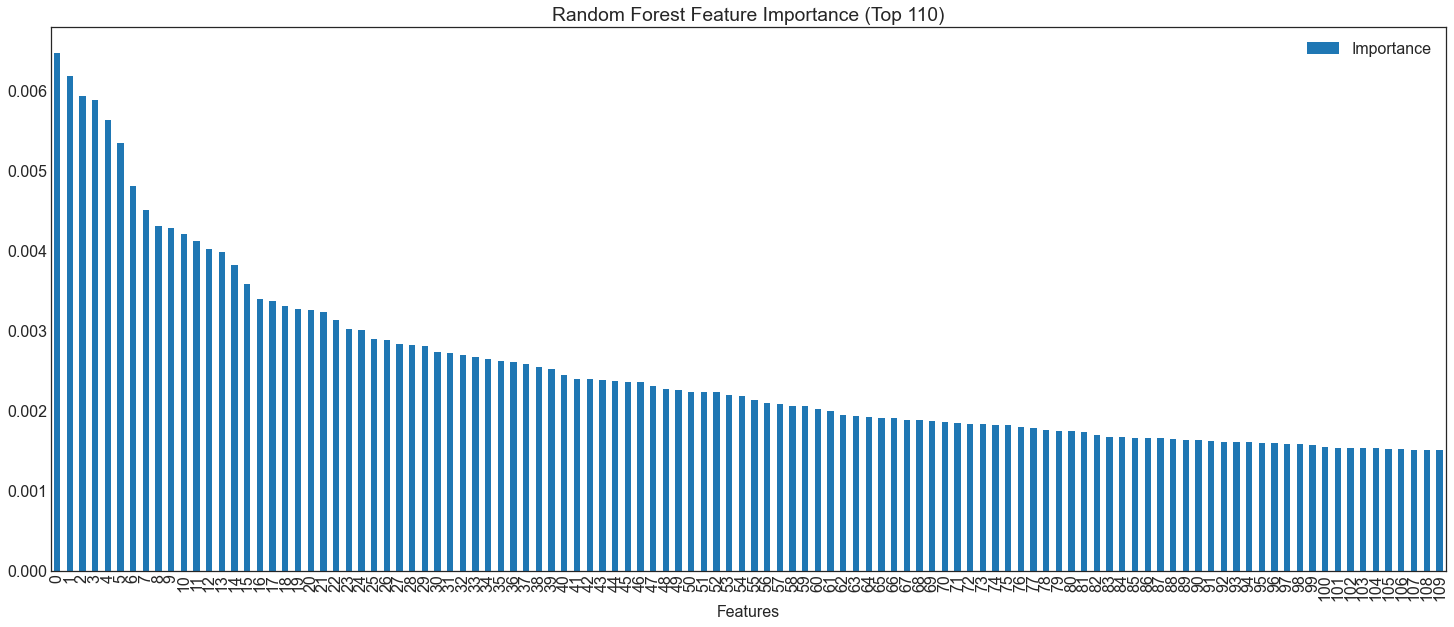

In [176]:
feat_impo_ranked[:110].plot.bar(figsize = (25, 10))
plt.title('Random Forest Feature Importance (Top 110)')
plt.xlabel('Features')
plt.show()

# Capire come mettere i nomi dei geni sull'asse x
# feat_impo = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# feat_impo[:110].plot.bar(figsize = (25, 10))

### Evaluation of the model
We check now how good is the performance of this Ranfom Forest classifier on the test dataset

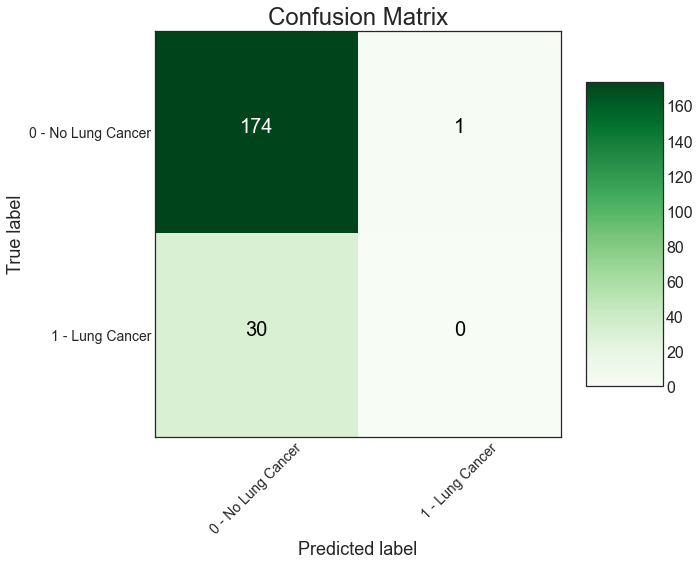

In [197]:
y_test_pred = rf_classifier.predict(X_test)

# Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred),
            classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
            title = 'Confusion Matrix')

### Finding the best model: choosing the right hyperparameters
We consider these main  hyperparameters for a Random Forest Classifier: 
1. *n_estimators*: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
1. *max_depth*: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
1. *min_samples_split*: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
1. *min_samples_leaf*: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.


We use RandomizedSearchCV to find the best tuning parameters

SPOILER: Very very bad result: completly fails in predicting the minority class =(

In [177]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 2311,
 'verbose': 0,
 'warm_start': False}


In [179]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(2, 68, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True, False]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 200).astype(int)),
               'bootstrap': bootstrap}

In [183]:
# First create a base model: 
rf = RandomForestClassifier(oob_score = True) 

In [216]:
# Then, use random grid to select the best model, based on the ROC_AUC score, hence scoring = 'roc_auc'
rf_random = RandomizedSearchCV(
                    estimator = rf,
                    param_distributions = random_grid,
                    n_iter = 2, cv = 5,
                    verbose = 2, random_state = 2311, 
                    scoring = 'roc_auc')

In [217]:
# Finally, fit the data
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END bootstrap=True, max_depth=48, max_features=auto, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=10, n_estimators=504; total time= 1.7min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END bootstrap=True, max_depth=48, max_features=auto, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=10, n_estimators=504; total time= 1.7min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END bootstrap=True, max_depth=48, max_features=auto, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=10, n_estimators=504; total time= 1.8min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END bootstrap=True, max_depth=48, max_features=auto, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=10, n_estimators=504; total time= 1.8min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END bootstrap=True, max_depth=48, max_features=auto, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=10, n_estimators=504; total time= 1.7min
[CV] END bootstrap=False, max_depth=35, max_features=log2, max_leaf_nodes=45, min_samples_leaf=10, min_samples_split=10, n_estimators=516; total time=   0.4s
[CV] END bootstrap=False, max_depth=35, max_features=log2, max_leaf_nodes=45, min_samples_leaf=10, min_samples_split=10, n_estimators=516; total time=   0.4s
[CV] END bootstrap=False, max_depth=35, max_features=log2, max_leaf_nodes=45, min_samples_leaf=10, min_samples_split=10, n_estimators=516; total time=   0.4s
[CV] END bootstrap=False, max_depth=35, max_features=log2, max_leaf_nodes=45, min_samples_leaf=10, min_samples_split=10, n_estimators=516; total time=   0.4s
[CV] END bootstrap=False, max_depth=35, max_features=log2, max_leaf_nodes=45, min_samples_leaf=10, min_samples_split=10, n_estimators=516; total time=   0.4s


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, 15, 21, 28, 35, 41,
                                                      48, 54, 61, 68, None],
                                        'max_features': ['auto', 'log2'],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12,
                                                           12, 13, 13, 13, 13,
                                                           13, 14, 14, 14, 14,
                                                           14, 15, 15, 15, 15, ...],
                                        'min_samples_leaf': [1, 4, 10],
                                        'mi

In [226]:
rf_random.best_params_

{'n_estimators': 504,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 35,
 'max_features': 'auto',
 'max_depth': 48,
 'bootstrap': True}

In [219]:
# n_nodes = []
# max_depths = []

# for ind_tree in best_model.estimators_:
#        n_nodes.append(ind_tree.tree_.node_count)
#        max_depths.append(ind_tree.tree_.max_depth)


# print(f'Average number of nodes {int(np.mean(n_nodes))}')
# print(f'Average maximum depth {int(np.mean(max_depths))}')

In [238]:
# Use the best model after tuning
best_model = rf_random.best_estimator_
# best_model = RandomForestClassifier(random_state = 2311, n_jobs = -1,
#                         n_estimators = 504, min_samples_leaf = 4, 
#                         min_samples_split = 10, max_leaf_nodes = 35,
#                         max_depth = 20, class_weight = "balanced_subsample",
#                         bootstrap = True, oob_score = True)


y_pred_best_model = best_model.predict(X_val)
y_pred_best_model.sum() 

63

Recall Baseline: 1.0 - Test: 0.97, Train: 0.98
Precision Baseline: 0.21 - Test: 1.0, Train: 1.0
Roc Baseline: 0.5 - Test: 1.0, Train: 1.0


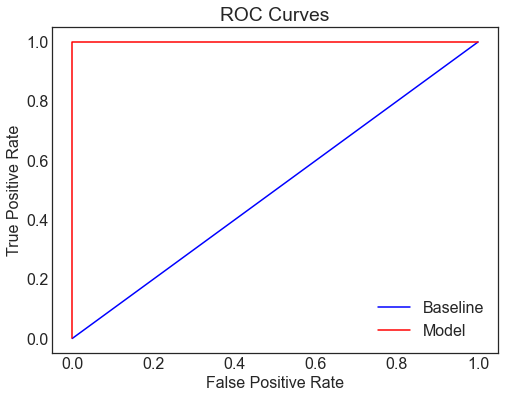

In [240]:
train_rf_predictions = best_model.predict(X_train_bis)
train_rf_probs = best_model.predict_proba(X_train_bis)[:, 1]
rf_probs = best_model.predict_proba(X_val)[:, 1]

# Plot ROC curve and check scores
evaluate_model(y_pred_best_model, rf_probs, train_rf_predictions, train_rf_probs)

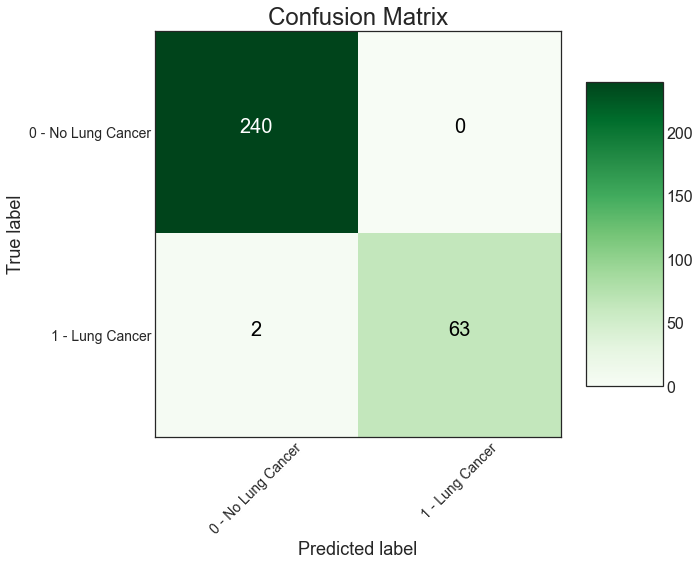

In [239]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_val, y_pred_best_model), 
            classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
            title = 'Confusion Matrix')

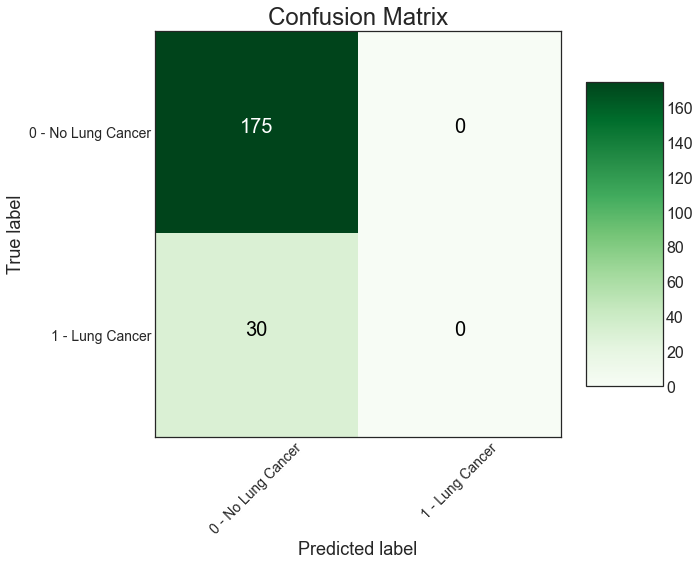

In [241]:
# Checking the best model on the test dataset
y_test_pred = best_model.predict(X_test)

# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test,y_test_pred), 
            classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
            title = 'Confusion Matrix')

-----------------

### Pruning (?)
Looking at the documentation of RandomForestClassifier, we see the attribute *ccp_alpha* (non-negative float, default = 0.0).

This is the complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.

In [247]:
rf_pruned_classifier = RandomForestClassifier(random_state = 2311, n_jobs = -1,
                        ccp_alpha = 0.001,
                        n_estimators = 504, min_samples_leaf = 4, 
                        min_samples_split = 10, max_leaf_nodes = 35,
                        max_depth = 20, class_weight = "balanced_subsample",
                        bootstrap = True, oob_score = True)

rf_pruned_classifier.fit(X_train, y_train)
print('Training score: ', rf_pruned_classifier.score(X_train_bis, y_train_bis))
print('Test score: ', rf_pruned_classifier.score(X_val, y_val))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Training score:  0.9703947368421053
Test score:  0.9934426229508196


In [249]:
# Feature Importances: sort the feature importances by most important first
feat_impo_ranked = pd.Series(rf_pruned_classifier.feature_importances_, index = X_train_bis.columns).sort_values(ascending = False)
feat_impo_ranked = pd.DataFrame({"Gene":feat_impo_ranked.index, "Importance":feat_impo_ranked.values})

# Print out the first 200 feature and importances
for gene in range(200):
    print(f"Gene '{feat_impo_ranked.Gene[gene]}' has Importance: {feat_impo_ranked.Importance[gene]}")

Gene 'RPP25L..138716.' has Importance: 0.008934240349136374
Gene 'HIST1H2BE..8344.' has Importance: 0.006704798737169308
Gene 'CCT4..10575.' has Importance: 0.006677356411170111
Gene 'NIPBL..25836.' has Importance: 0.005608043456648217
Gene 'LINS1..55180.' has Importance: 0.005582131084584106
Gene 'OLR1..4973.' has Importance: 0.0054361266436732366
Gene 'HIST1H2BC..8347.' has Importance: 0.0054015945320020605
Gene 'MRPS23..51649.' has Importance: 0.005321226847676119
Gene 'POLR3K..51728.' has Importance: 0.005218755092722437
Gene 'DUPD1..338599.' has Importance: 0.00512258889001909
Gene 'INSL5..10022.' has Importance: 0.005017341902794694
Gene 'DNM2..1785.' has Importance: 0.004892980980096308
Gene 'HIST1H2BN..8341.' has Importance: 0.004707696994646792
Gene 'RAB18..22931.' has Importance: 0.004686033424429498
Gene 'POP7..10248.' has Importance: 0.004188808264189017
Gene 'FANCB..2187.' has Importance: 0.003781880053510861
Gene 'NECAP1..25977.' has Importance: 0.003664746381402304
Gene 

In [255]:
len(feat_impo_ranked[feat_impo_ranked.Importance > 0.0015])
# feat_impo = pd.Series(rf_pruned_classifier.feature_importances_, index = X_train_bis.columns).sort_values(ascending = False)
# feat_impo[:150].plot.bar(figsize = (25, 10))

54

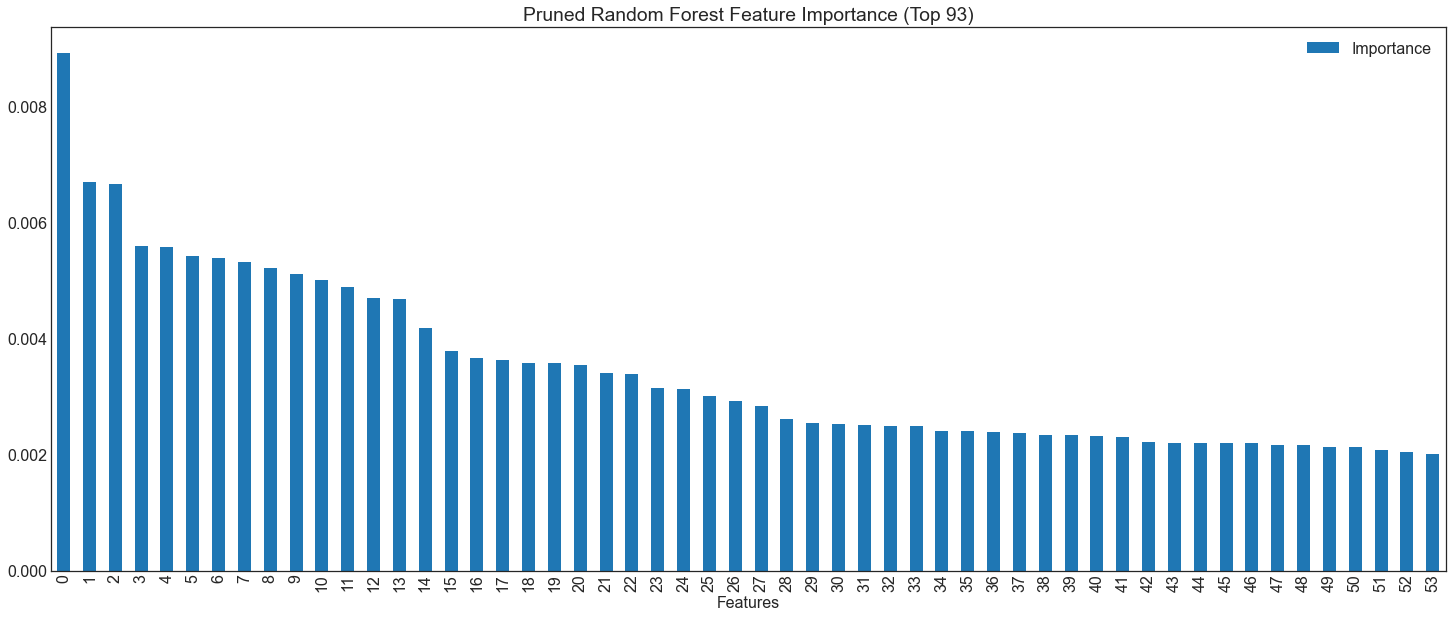

In [256]:
feat_impo_ranked[:93].plot.bar(figsize = (25, 10))
plt.title('Pruned Random Forest Feature Importance (Top 93)')
plt.xlabel('Features')
plt.show()

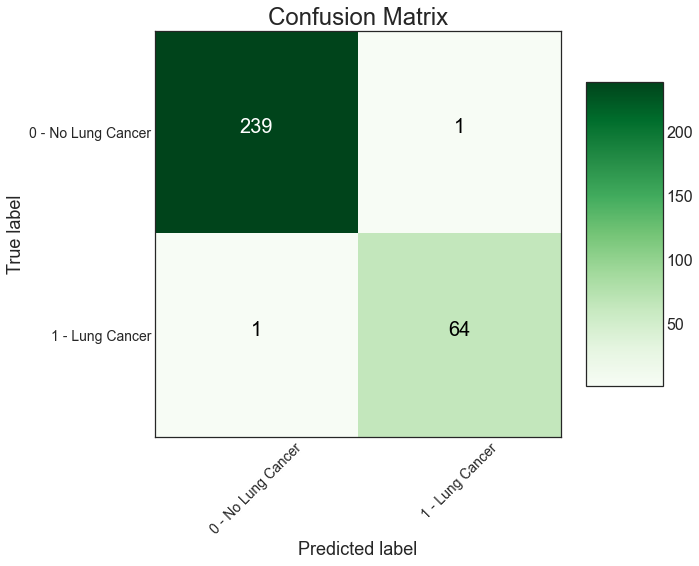

In [253]:
y_pred_prun = rf_pruned_classifier.predict(X_val)

plot_confusion_matrix(confusion_matrix(y_val, y_pred_prun), 
            classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
            title = 'Confusion Matrix')

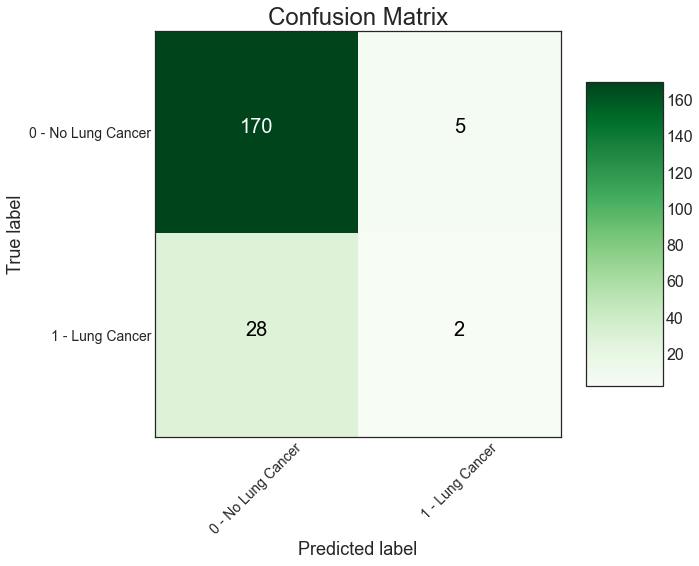

In [254]:
y_test_pred = rf_pruned_classifier.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test,y_test_pred), 
            classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
            title = 'Confusion Matrix')

# La situa è migliorata! =)

In [271]:
# Let us try cv for finding the optimal alpha
ccp_alpha = [float(x) for x in np.linspace(start = 0.0001, stop = 0.01, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(2, 50, num = 15)]   # Maximum number of levels in tree
max_depth.append(None)

random_grid = {'ccp_alpha': ccp_alpha,
               'max_features': max_features,
               'max_depth': max_depth}

# First create a base model: 
rf = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 4, 
                        min_samples_split = 10, max_leaf_nodes = 35,
                        class_weight = "balanced_subsample",
                        bootstrap = True, oob_score = True)

# Then, use random grid to select the best model, based on the ROC_AUC score, hence scoring = 'roc_auc'
rf_random = RandomizedSearchCV(
                    estimator = rf,
                    param_distributions = random_grid,
                    n_iter = 2, cv = 3,
                    verbose = 2, random_state = 2311, 
                    scoring = 'roc_auc')


In [272]:
# Finally, fit the data
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END ccp_alpha=0.0001, max_depth=None, max_features=auto; total time= 1.3min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END ccp_alpha=0.0001, max_depth=None, max_features=auto; total time= 1.4min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END ccp_alpha=0.0001, max_depth=None, max_features=auto; total time= 1.4min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END ccp_alpha=0.0071714285714285725, max_depth=26, max_features=auto; total time= 1.3min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END ccp_alpha=0.0071714285714285725, max_depth=26, max_features=auto; total time= 1.4min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END ccp_alpha=0.0071714285714285725, max_depth=26, max_features=auto; total time= 1.4min


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    max_leaf_nodes=35,
                                                    min_samples_leaf=4,
                                                    min_samples_split=10,
                                                    n_estimators=500,
                                                    oob_score=True),
                   n_iter=2,
                   param_distributions={'ccp_alpha': [0.0001,
                                                      0.0003020408163265306,
                                                      0.0005040816326530613,
                                                      0.000706122448979592,
                                                      0.0009081632653061226,
                                                      0.0011102040816326532,
                                                      0.0

In [273]:
rf_random.best_params_

{'max_features': 'auto', 'max_depth': 26, 'ccp_alpha': 0.0071714285714285725}

In [277]:
rf_pruned_classifier = RandomForestClassifier(random_state = 2311, n_jobs = -1,
                        ccp_alpha = 0.007,
                        n_estimators = 500, min_samples_leaf = 4, 
                        min_samples_split = 10, max_leaf_nodes = 35,
                        max_depth = 26, class_weight = "balanced_subsample",
                        bootstrap = True, oob_score = True)

rf_pruned_classifier.fit(X_train, y_train)
print('Training score: ', rf_pruned_classifier.score(X_train_bis, y_train_bis))
print('Test score: ', rf_pruned_classifier.score(X_val, y_val))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Training score:  1.0
Test score:  1.0


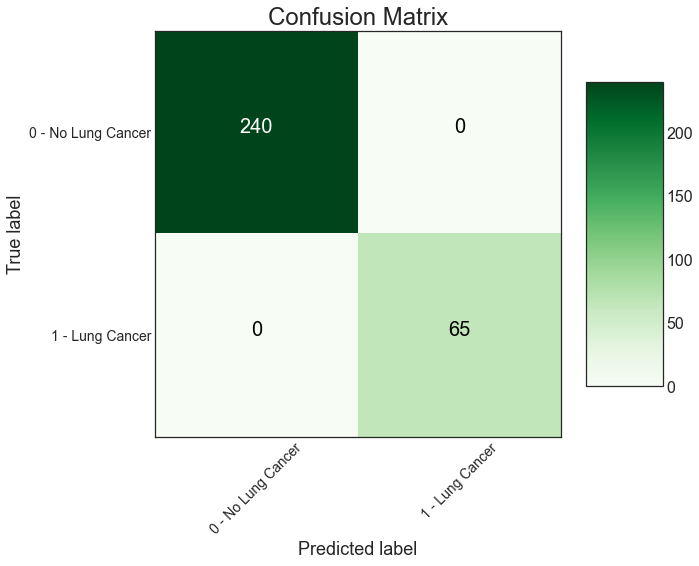

In [278]:
y_pred_prun = rf_pruned_classifier.predict(X_val)

plot_confusion_matrix(confusion_matrix(y_val, y_pred_prun), 
            classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
            title = 'Confusion Matrix')

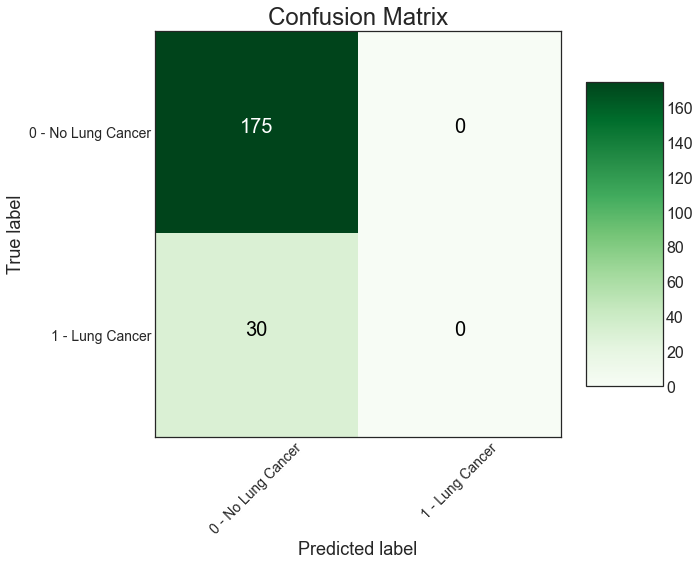

In [279]:
y_test_pred = rf_pruned_classifier.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test,y_test_pred), 
            classes = ['0 - No Lung Cancer', '1 - Lung Cancer'],
            title = 'Confusion Matrix')

# La situa non è cambiata rispetto alla rf con i tuning parameter ottimali =(